### Import das dependências

In [1]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

### Importar os datasets

In [2]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/merged-dataset-densidade.csv'

merged_df = pd.read_csv(merged_path)


### Verificar qualidade dos dados
- Verificar valores null
- Verificar duplicados

In [3]:
# Verificar valores vazios
nulls = merged_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = merged_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())


Número de nulls:  ano                                          0
mes                                          0
energia_ativa_baixa_tensao_kwh               0
energia_ativa_alta_tensao_kwh                0
cpes_domestico_baixa_tensao                  0
cpes_domestico_alta_tensao                   0
cpes_iluminacao_publica_baixa_tensao         0
cpes_iluminacao_publica_alta_tensao          0
cpes_nao_domestico_baixa_tensao              0
cpes_nao_domestico_alta_tensao               0
cpes_outros_baixa_tensao                     0
cpes_outros_alta_tensao                      0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
densidade_populacional_pessoas_km2           0
dtype: int64
Número de linhas duplicadas: 0


In [4]:
# Estatísticas sumarizadas
merged_df.describe()

,ano,mes,energia_ativa_baixa_tensao_kwh,energia_ativa_alta_tensao_kwh,cpes_domestico_baixa_tensao,cpes_domestico_alta_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_iluminacao_publica_alta_tensao,cpes_nao_domestico_baixa_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_baixa_tensao,cpes_outros_alta_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao,densidade_populacional_pessoas_km2
count,4914.000000,4914.000000,4.914000e+03,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.0,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,2022.777778,7.166667,6.473418e+06,6.872585e+06,18802.326414,0.040090,214.084046,0.0,4241.061661,95.435694,128.958079,0.385836,27020.995319,9.315832,314.549084
std,0.532924,3.625129,1.161919e+07,1.423193e+07,29402.960918,0.209242,194.120963,0.0,6870.529538,121.195235,206.186626,4.184540,45854.018577,24.622134,856.179130
min,2022.000000,1.000000,1.390660e+05,0.000000e+00,1042.000000,0.000000,7.000000,0.0,174.000000,0.000000,1.000000,0.000000,1144.000000,0.000000,4.300000
25%,2022.000000,4.000000,1.269620e+06,4.162925e+05,4581.000000,0.000000,91.000000,0.0,1101.000000,28.000000,21.000000,0.000000,6044.000000,2.000000,24.700000
50%,2023.000000,8.000000,2.618006e+06,1.837661e+06,8936.000000,0.000000,141.000000,0.0,1989.500000,51.000000,54.000000,0.000000,11336.000000,2.000000,66.400000
75%,2023.000000,10.000000,7.045592e+06,5.952910e+06,21427.000000,0.000000,280.000000,0.0,4897.250000,119.000000,157.000000,0.000000,29565.500000,6.000000,176.700000
max,2024.000000,12.000000,1.633807e+08,1.279470e+08,312074.000000,2.000000,1185.000000,0.0,79984.000000,1226.000000,2186.000000,75.000000,528158.000000,382.000000,7310.100000


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ano                                        4914 non-null   int64  
 1   mes                                        4914 non-null   int64  
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64  
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64  
 4   cpes_domestico_baixa_tensao                4914 non-null   int64  
 5   cpes_domestico_alta_tensao                 4914 non-null   int64  
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64  
 7   cpes_iluminacao_publica_alta_tensao        4914 non-null   int64  
 8   cpes_nao_domestico_baixa_tensao            4914 non-null   int64  
 9   cpes_nao_domestico_alta_tensao             4914 non-null   int64  
 10  cpes_outros_baixa_tensao

### Verificar a correlação entre as variáveis númericas

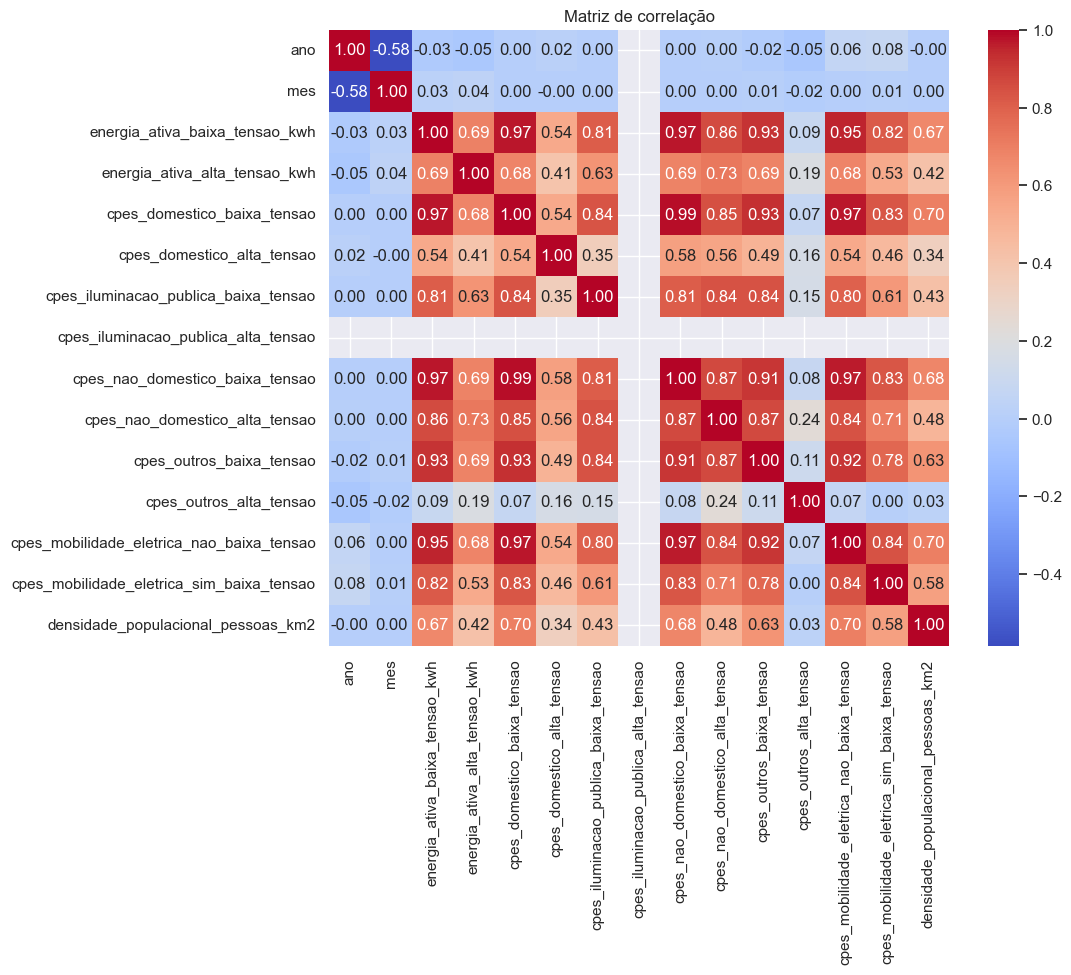

In [6]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação')
plt.show()

### Procurar por Outliers

In [7]:
def find_outliers(f):
    q1 = f.quantile(0.25)
    q3 = f.quantile(0.75)
    iqr = q3 - q1
    return f[(f < (q1 - 1.5 * iqr)) | (f > (q3 + 1.5 * iqr))]

#### Gráfico da variável Ano

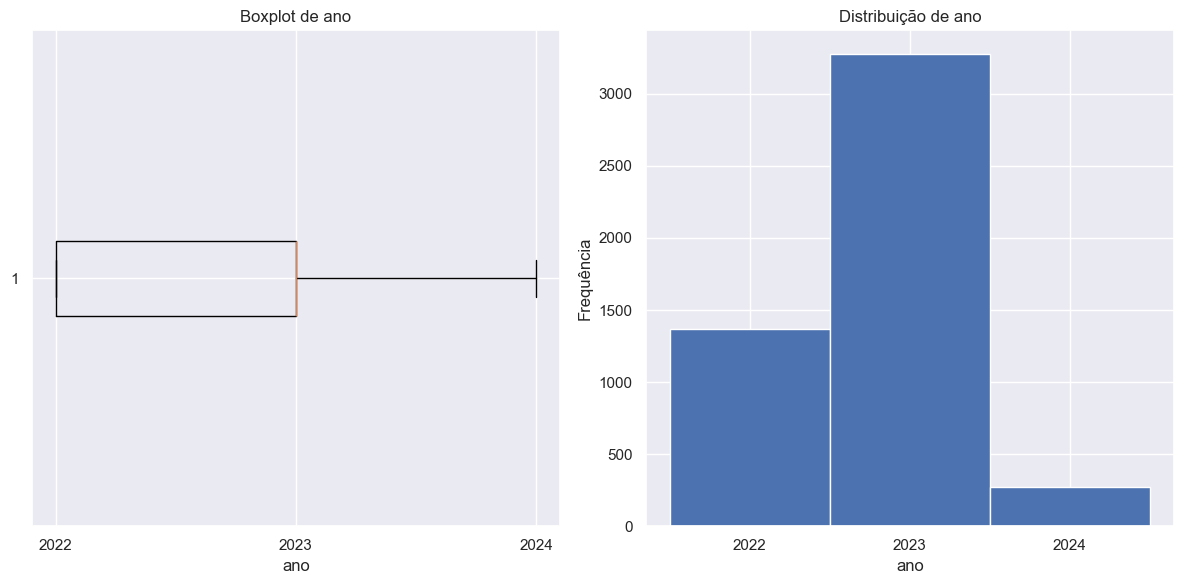

In [8]:
# Coluna para analisar
coluna_ano = 'ano'

# Configuração dos bins para ficarem alinhados com os anos
# Encontrar o menor e o maior ano no DataFrame
min_ano = merged_df[coluna_ano].min()
max_ano = merged_df[coluna_ano].max()

# Criar uma lista de bins do ano menor para o maior, com um bin para cada ano
bins = np.arange(min_ano, max_ano + 2) - 0.5  # Ajuste de 0.5 para alinhar os ticks nos anos

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_ano], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_ano}')
ax_boxplot.set_xlabel(coluna_ano)
# Ajustar os ticks do eixo x para que se alinhem com os anos
ax_boxplot.set_xticks(np.arange(min_ano, max_ano + 1))

# Histograma
ax_hist.hist(merged_df[coluna_ano], bins=bins)
ax_hist.set_title(f'Distribuição de {coluna_ano}')
ax_hist.set_xlabel(coluna_ano)
ax_hist.set_ylabel('Frequência')
# Ajustar os ticks do eixo x para que se alinhem com os anos
ax_hist.set_xticks(np.arange(min_ano, max_ano + 1))

plt.tight_layout()
plt.show()



In [9]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_ano])
print(f"Outliers na coluna '{coluna_ano}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_ano])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_ano}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'ano':
Series([], Name: ano, dtype: int64)

% outliers 'ano' é de 0.00%.


#### Gráfico da variável Mês

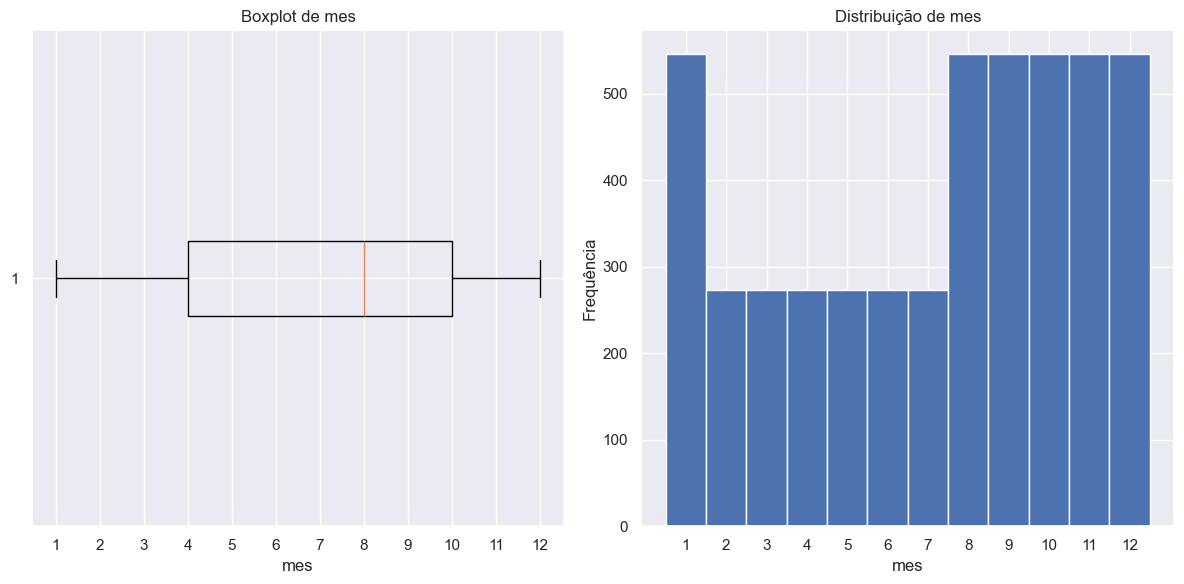

In [10]:
# Coluna para analisar
coluna_mes = 'mes'

# Configuração dos bins para ficarem alinhados com os meses
# Encontrar o menor e o maior mês no DataFrame
min_mes = merged_df[coluna_mes].min()
max_mes = merged_df[coluna_mes].max()

# Criar uma lista de bins do mes menor para o maior, com um bin para cada mes
bins = np.arange(min_mes, max_mes + 2) - 0.5  # Ajuste de 0.5 para alinhar os ticks nos meses

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_mes], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_mes}')
ax_boxplot.set_xlabel(coluna_mes)
# Ajustar os ticks do eixo x para que se alinhem com os meses
ax_boxplot.set_xticks(np.arange(min_mes, max_mes + 1))

# Histograma
ax_hist.hist(merged_df[coluna_mes], bins=bins)
ax_hist.set_title(f'Distribuição de {coluna_mes}')
ax_hist.set_xlabel(coluna_mes)
ax_hist.set_ylabel('Frequência')
# Ajustar os ticks do eixo x para que se alinhem com os meses
ax_hist.set_xticks(np.arange(min_mes, max_mes + 1))

plt.tight_layout()
plt.show()


In [11]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_mes])
print(f"Outliers na coluna '{coluna_mes}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'mês'
total_valores = len(merged_df[coluna_mes])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_mes}' é de {percent_outliers:.2f}%.")


Outliers na coluna 'mes':
Series([], Name: mes, dtype: int64)

% outliers 'mes' é de 0.00%.


#### Gráfico da variável Energia Ativa Baixa Tensão (kWh)

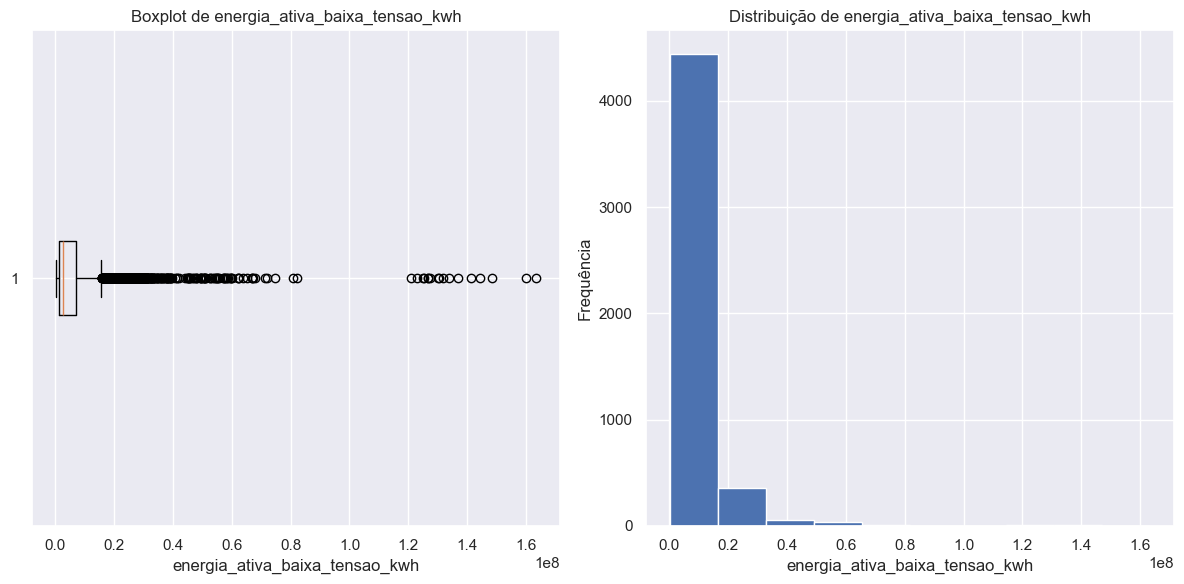

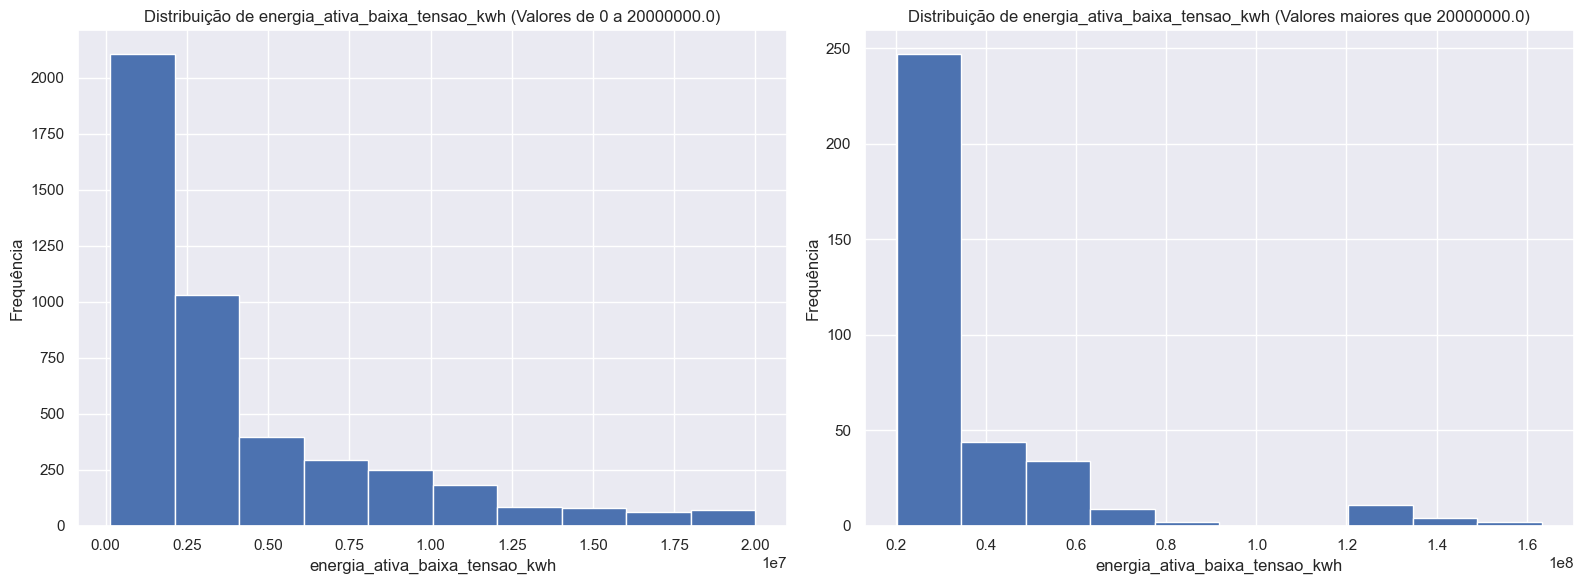

In [12]:
# Coluna para analisar
coluna_energia_ativa_baixa = 'energia_ativa_baixa_tensao_kwh'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_energia_ativa_baixa], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_energia_ativa_baixa}')
ax_boxplot.set_xlabel(coluna_energia_ativa_baixa)

# Histograma
ax_hist.hist(merged_df[coluna_energia_ativa_baixa], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_energia_ativa_baixa}')
ax_hist.set_xlabel(coluna_energia_ativa_baixa)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 0.2 * 1e8 (20.000.000 kWh)
lower_limit_1 = 0
high_limit_1 = 0.2 * 1e8
filtered_data_1 = merged_df[(merged_df[coluna_energia_ativa_baixa] >= lower_limit_1) & (merged_df[coluna_energia_ativa_baixa] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 0.2 * 1e8 (20.000.000 kWh)
filtered_data_2 = merged_df[(merged_df[coluna_energia_ativa_baixa] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 0.2 * 1e8
axes[0].hist(filtered_data_1[coluna_energia_ativa_baixa], bins=10)
axes[0].set_title(f'Distribuição de {coluna_energia_ativa_baixa} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_energia_ativa_baixa)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 0.2 * 1e8
axes[1].hist(filtered_data_2[coluna_energia_ativa_baixa], bins=10)
axes[1].set_title(f'Distribuição de {coluna_energia_ativa_baixa} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_energia_ativa_baixa)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [13]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_energia_ativa_baixa])
print(f"Outliers na coluna '{coluna_energia_ativa_baixa}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_energia_ativa_baixa])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_energia_ativa_baixa}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'energia_ativa_baixa_tensao_kwh':
72      25093203
73      21585438
74      19745170
75      16893126
76      17309491
          ...   
4800    17435080
4801    16295127
4802    17851644
4803    19989259
4804    23558504
Name: energia_ativa_baixa_tensao_kwh, Length: 492, dtype: int64

% outliers 'energia_ativa_baixa_tensao_kwh' é de 10.01%.


#### Gráfico da variável Energia Ativa Alta Tensão (kWh)

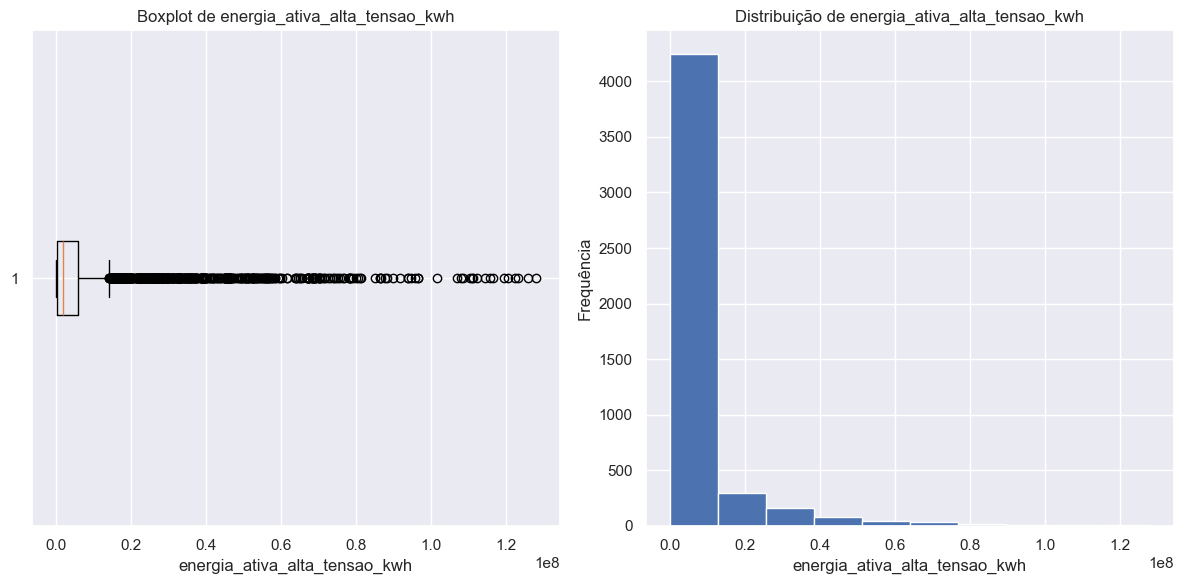

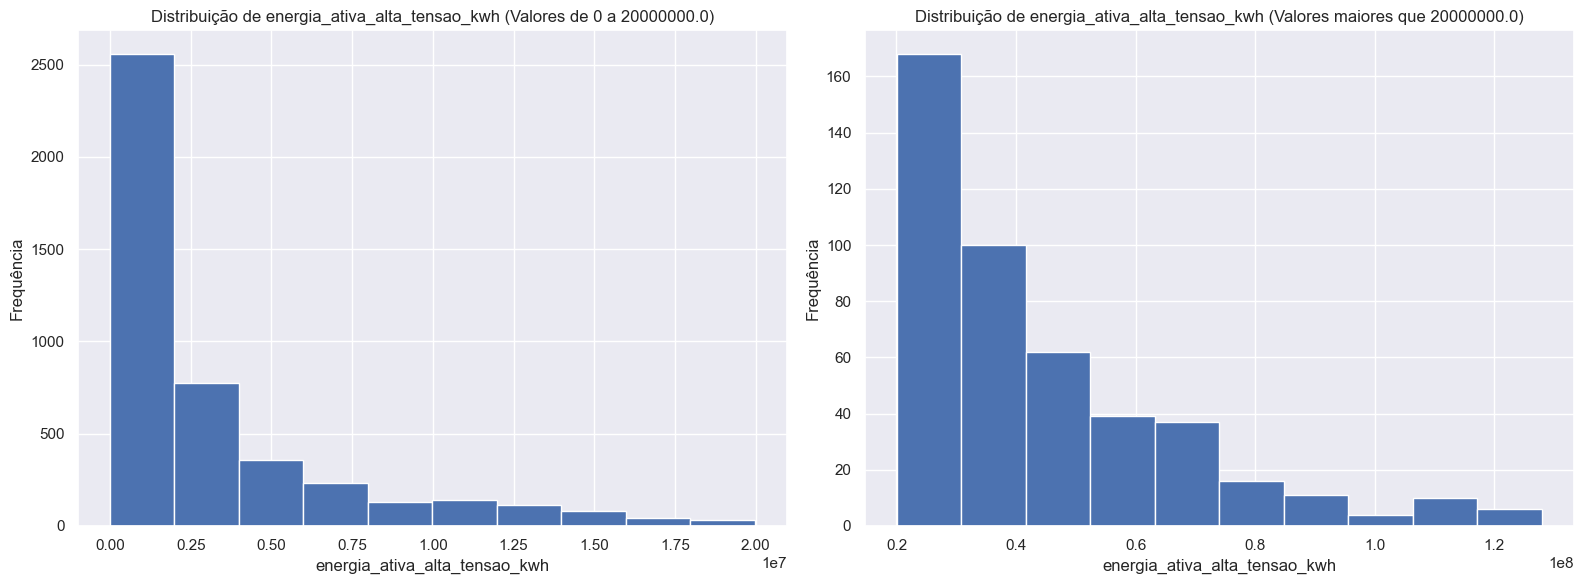

In [14]:
# Coluna para analisar
coluna_energia_ativa_alta = 'energia_ativa_alta_tensao_kwh'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_energia_ativa_alta], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_energia_ativa_alta}')
ax_boxplot.set_xlabel(coluna_energia_ativa_alta)

# Histograma
ax_hist.hist(merged_df[coluna_energia_ativa_alta], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_energia_ativa_alta}')
ax_hist.set_xlabel(coluna_energia_ativa_alta)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 0.2 * 1e8 (20.000.000 kWh)
lower_limit_1 = 0
high_limit_1 = 0.2 * 1e8
filtered_data_1 = merged_df[(merged_df[coluna_energia_ativa_alta] >= lower_limit_1) & (merged_df[coluna_energia_ativa_alta] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 0.2 * 1e8 (20.000.000 kWh)
filtered_data_2 = merged_df[(merged_df[coluna_energia_ativa_alta] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 0.2 * 1e8
axes[0].hist(filtered_data_1[coluna_energia_ativa_alta], bins=10)
axes[0].set_title(f'Distribuição de {coluna_energia_ativa_alta} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_energia_ativa_alta)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 0.2 * 1e8
axes[1].hist(filtered_data_2[coluna_energia_ativa_alta], bins=10)
axes[1].set_title(f'Distribuição de {coluna_energia_ativa_alta} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_energia_ativa_alta)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [15]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_energia_ativa_alta])
print(f"Outliers na coluna '{coluna_energia_ativa_alta}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_energia_ativa_alta])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_energia_ativa_alta}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'energia_ativa_alta_tensao_kwh':
84      14733998
191     14516812
193     14668338
194     15084669
195     14761267
          ...   
4855    15259910
4856    17887577
4857    17759223
4858    15114088
4871    14548785
Name: energia_ativa_alta_tensao_kwh, Length: 595, dtype: int64

% outliers 'energia_ativa_alta_tensao_kwh' é de 12.11%.


#### Gráfico da variável CPEs Doméstico Baixa Tensão

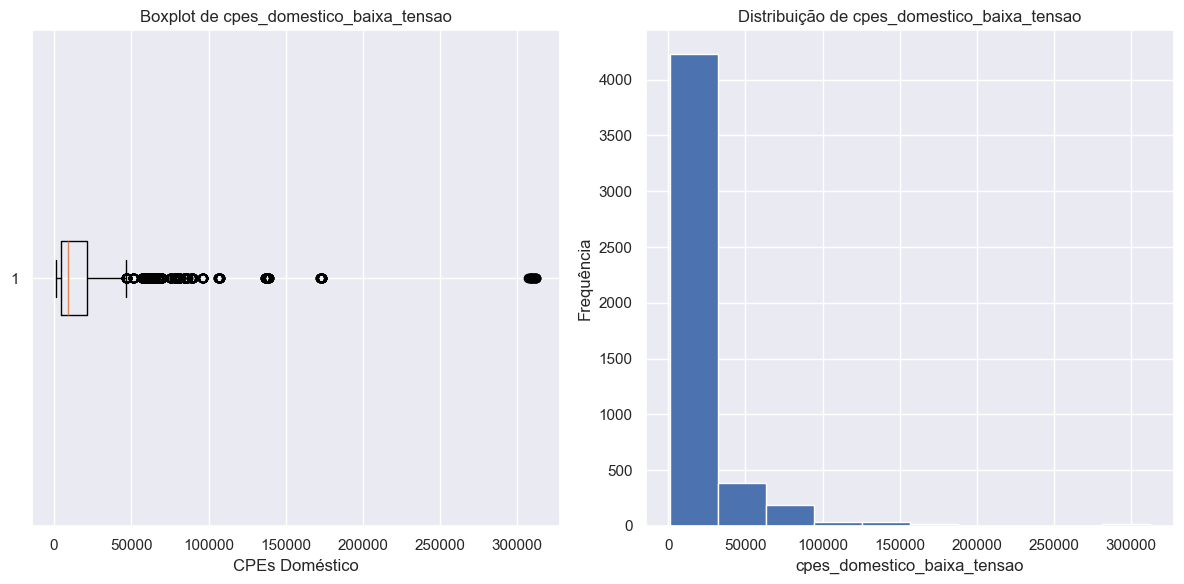

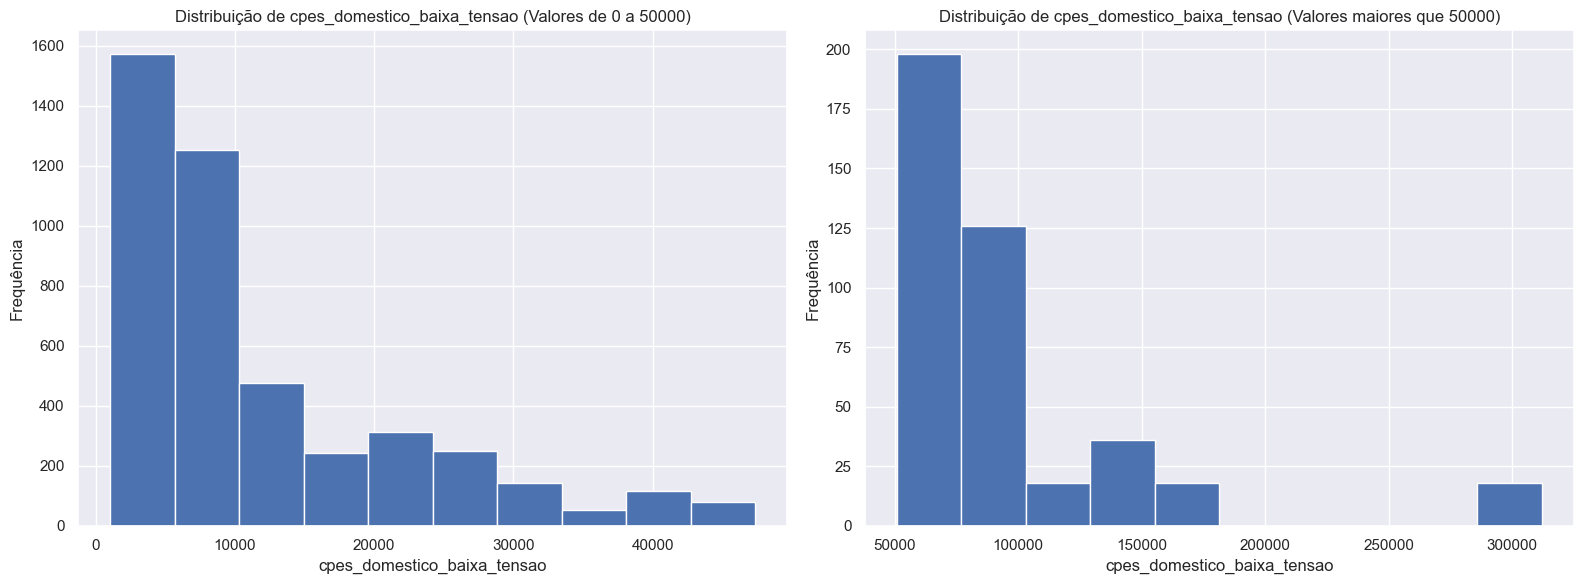

In [16]:
# Coluna para o histograma
coluna_cpes_domestico_baixa = 'cpes_domestico_baixa_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_domestico_baixa], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_domestico_baixa}')
ax_boxplot.set_xlabel('CPEs Doméstico')


# Histograma
ax_hist.hist(merged_df[coluna_cpes_domestico_baixa], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_domestico_baixa}')
ax_hist.set_xlabel(coluna_cpes_domestico_baixa)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 50000
lower_limit_1 = 0
high_limit_1 = 50000
filtered_data_1 = merged_df[(merged_df[coluna_cpes_domestico_baixa] >= lower_limit_1) & (merged_df[coluna_cpes_domestico_baixa] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 50000
filtered_data_2 = merged_df[(merged_df[coluna_cpes_domestico_baixa] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 50000
axes[0].hist(filtered_data_1[coluna_cpes_domestico_baixa], bins=10)
axes[0].set_title(f'Distribuição de {coluna_cpes_domestico_baixa} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_cpes_domestico_baixa)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 50000
axes[1].hist(filtered_data_2[coluna_cpes_domestico_baixa], bins=10)
axes[1].set_title(f'Distribuição de {coluna_cpes_domestico_baixa} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_cpes_domestico_baixa)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [17]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_domestico_baixa])
print(f"Outliers na coluna '{coluna_cpes_domestico_baixa}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_cpes_domestico_baixa])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_domestico_baixa}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_domestico_baixa_tensao':
270     95992
271     96053
272     96105
273     96142
274     96146
        ...  
4801    51429
4802    51484
4803    51532
4804    51562
4805    51612
Name: cpes_domestico_baixa_tensao, Length: 439, dtype: int64

% outliers 'cpes_domestico_baixa_tensao' é de 8.93%.


#### Gráfico da variável CPEs Doméstico Alta Tensão

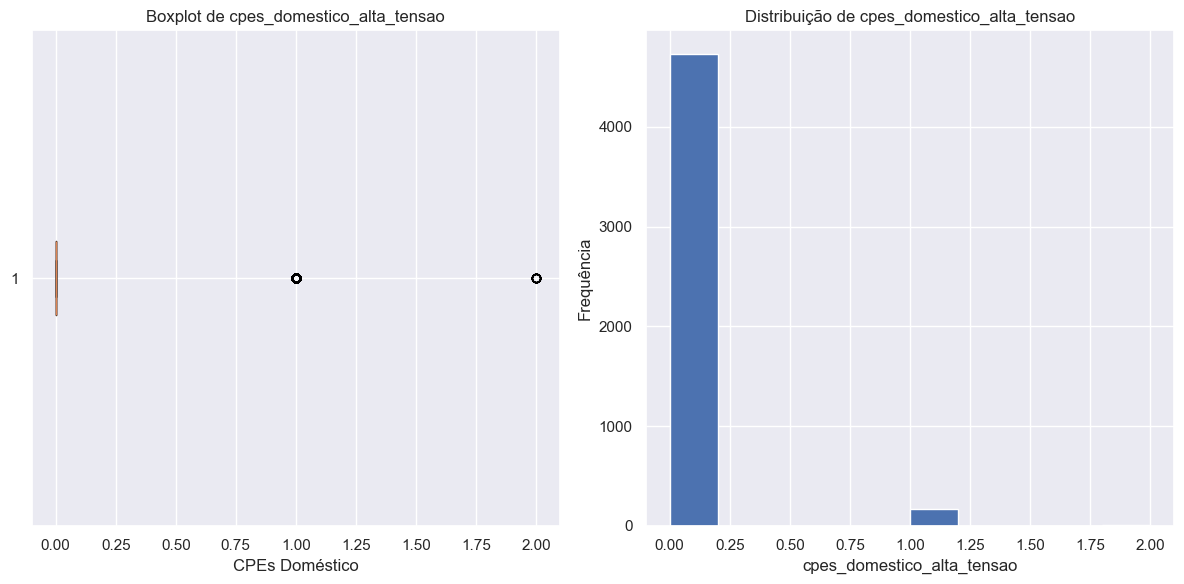

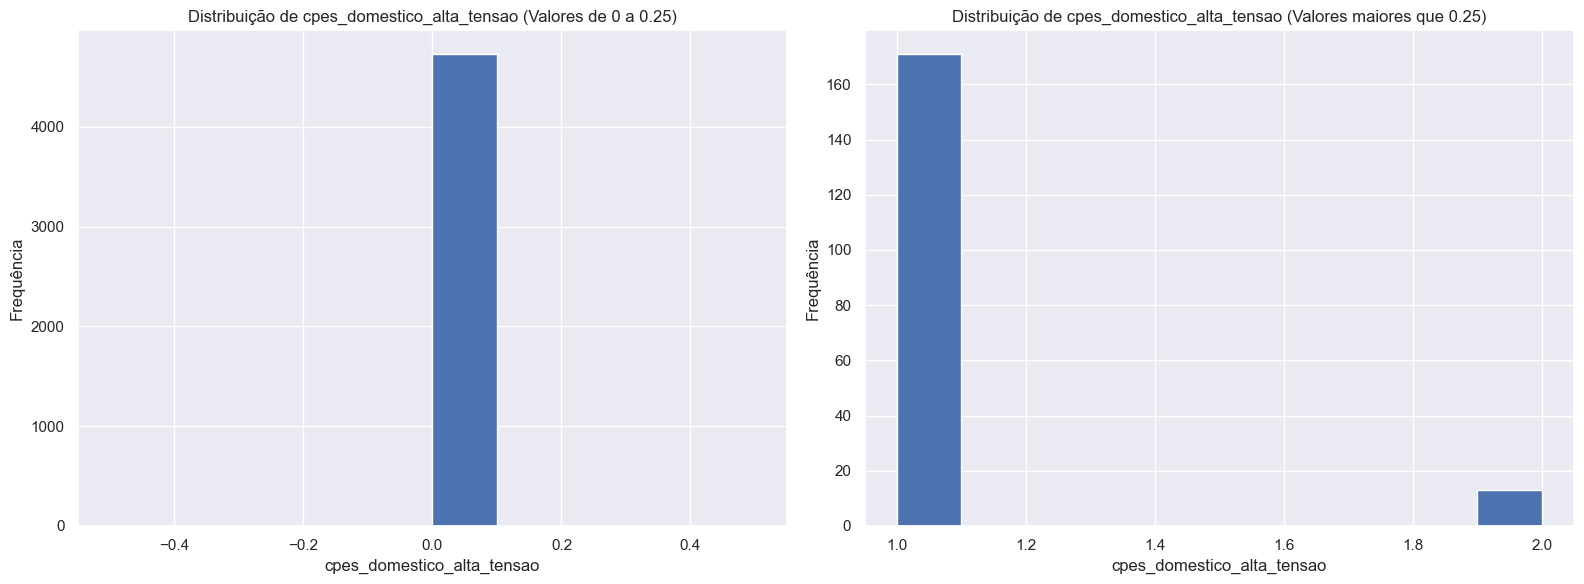

In [18]:
# Coluna para o histograma
coluna_cpes_domestico_alta = 'cpes_domestico_alta_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_domestico_alta], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_domestico_alta}')
ax_boxplot.set_xlabel('CPEs Doméstico')


# Histograma
ax_hist.hist(merged_df[coluna_cpes_domestico_alta], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_domestico_alta}')
ax_hist.set_xlabel(coluna_cpes_domestico_alta)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 50000
lower_limit_1 = 0
high_limit_1 = 0.25
filtered_data_1 = merged_df[(merged_df[coluna_cpes_domestico_alta] >= lower_limit_1) & (merged_df[coluna_cpes_domestico_alta] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 50000
filtered_data_2 = merged_df[(merged_df[coluna_cpes_domestico_alta] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 50000
axes[0].hist(filtered_data_1[coluna_cpes_domestico_alta], bins=10)
axes[0].set_title(f'Distribuição de {coluna_cpes_domestico_alta} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_cpes_domestico_alta)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 50000
axes[1].hist(filtered_data_2[coluna_cpes_domestico_alta], bins=10)
axes[1].set_title(f'Distribuição de {coluna_cpes_domestico_alta} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_cpes_domestico_alta)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [19]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_domestico_alta])
print(f"Outliers na coluna '{coluna_cpes_domestico_alta}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'coluna_cpes_domestico_alta'
total_valores = len(merged_df[coluna_cpes_domestico_alta])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_domestico_alta}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_domestico_alta_tensao':
479     1
480     1
481     1
482     1
483     1
       ..
4819    1
4820    1
4821    1
4822    1
4823    1
Name: cpes_domestico_alta_tensao, Length: 184, dtype: int64

% outliers 'cpes_domestico_alta_tensao' é de 3.74%.


#### Gráfico da variável CPEs Iluminação Pública Alta Tensão

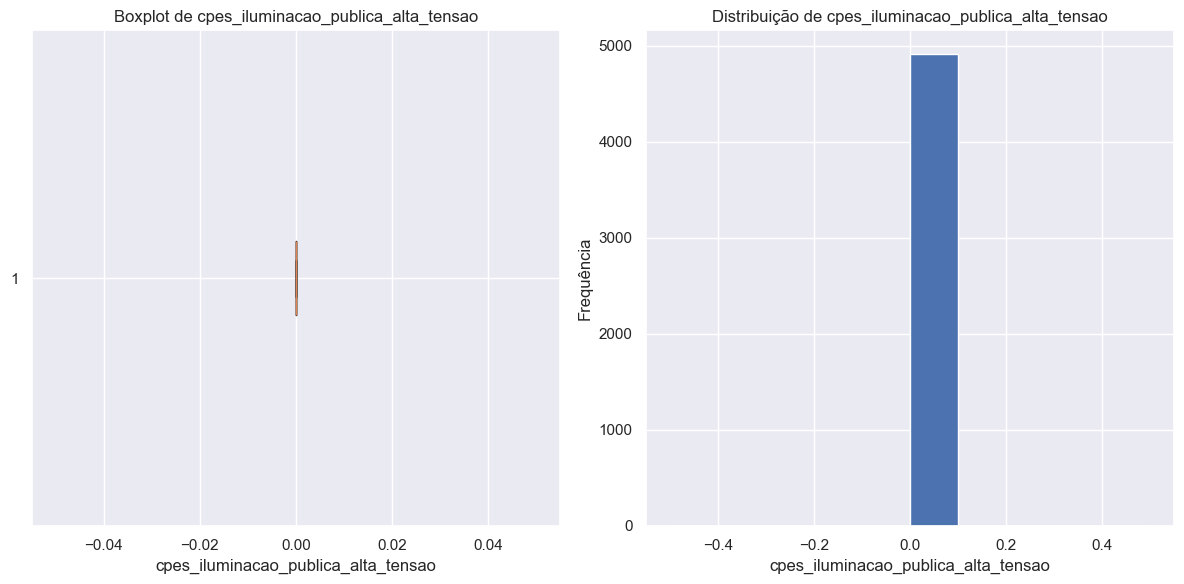

In [20]:
# Coluna para o histograma
coluna_cpes_il_pub_alta = 'cpes_iluminacao_publica_alta_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_il_pub_alta], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_il_pub_alta}')
ax_boxplot.set_xlabel(coluna_cpes_il_pub_alta)

# Histograma
ax_hist.hist(merged_df[coluna_cpes_il_pub_alta], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_il_pub_alta}')
ax_hist.set_xlabel(coluna_cpes_il_pub_alta)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [21]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_il_pub_alta])
print(f"Outliers na coluna '{coluna_cpes_il_pub_alta}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'cpes iluminacao publica'
total_valores = len(merged_df[coluna_cpes_il_pub_alta])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_il_pub_alta}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_iluminacao_publica_alta_tensao':
Series([], Name: cpes_iluminacao_publica_alta_tensao, dtype: int64)

% outliers 'cpes_iluminacao_publica_alta_tensao' é de 0.00%.


#### Gráfico da variável CPEs Iluminação Pública Baixa Tensão

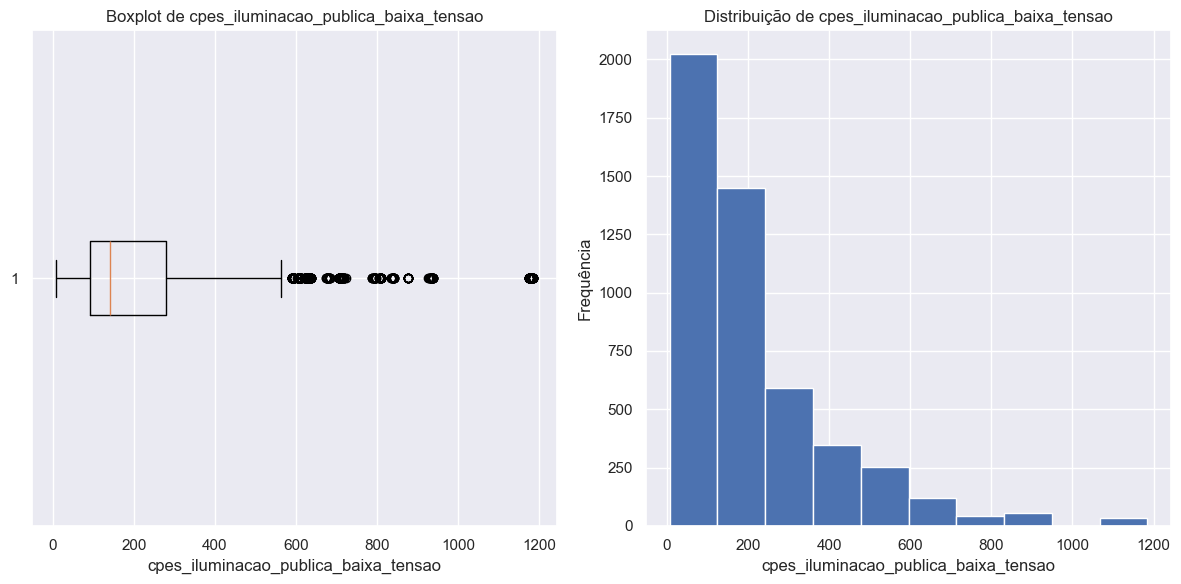

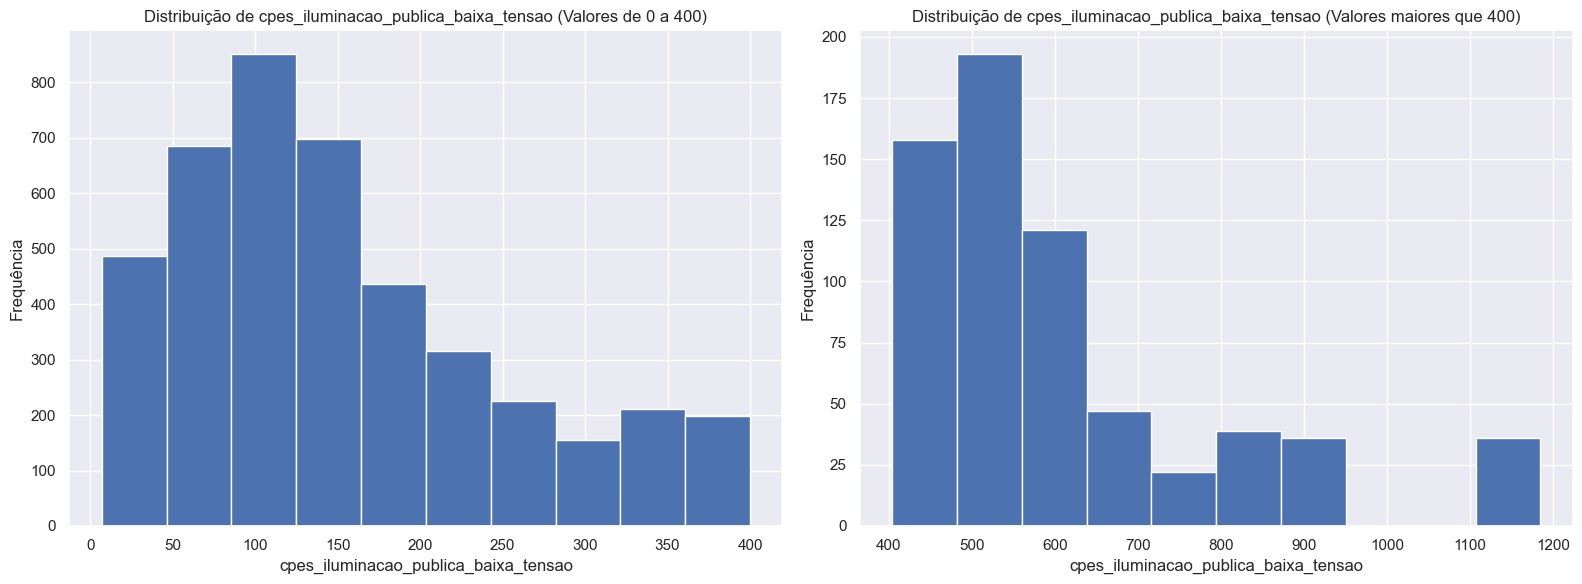

In [22]:
# Coluna para o histograma
coluna_cpes_il_pub_baixa = 'cpes_iluminacao_publica_baixa_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_il_pub_baixa], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_il_pub_baixa}')
ax_boxplot.set_xlabel(coluna_cpes_il_pub_baixa)

# Histograma
ax_hist.hist(merged_df[coluna_cpes_il_pub_baixa], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_il_pub_baixa}')
ax_hist.set_xlabel(coluna_cpes_il_pub_baixa)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 400
lower_limit_1 = 0
high_limit_1 = 400
filtered_data_1 = merged_df[(merged_df[coluna_cpes_il_pub_baixa] >= lower_limit_1) & (merged_df[coluna_cpes_il_pub_baixa] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 400
filtered_data_2 = merged_df[(merged_df[coluna_cpes_il_pub_baixa] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 400
axes[0].hist(filtered_data_1[coluna_cpes_il_pub_baixa], bins=10)
axes[0].set_title(f'Distribuição de {coluna_cpes_il_pub_baixa} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_cpes_il_pub_baixa)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 400
axes[1].hist(filtered_data_2[coluna_cpes_il_pub_baixa], bins=10)
axes[1].set_title(f'Distribuição de {coluna_cpes_il_pub_baixa} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_cpes_il_pub_baixa)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [23]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_il_pub_baixa])
print(f"Outliers na coluna '{coluna_cpes_il_pub_baixa}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'cpes iluminacao publica'
total_valores = len(merged_df[coluna_cpes_il_pub_baixa])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_il_pub_baixa}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_iluminacao_publica_baixa_tensao':
702     619
703     625
704     625
705     628
706     629
       ... 
4801    718
4802    717
4803    718
4804    718
4805    724
Name: cpes_iluminacao_publica_baixa_tensao, Length: 288, dtype: int64

% outliers 'cpes_iluminacao_publica_baixa_tensao' é de 5.86%.


#### Gráfico da variável CPEs Não Doméstico Alta Tensão

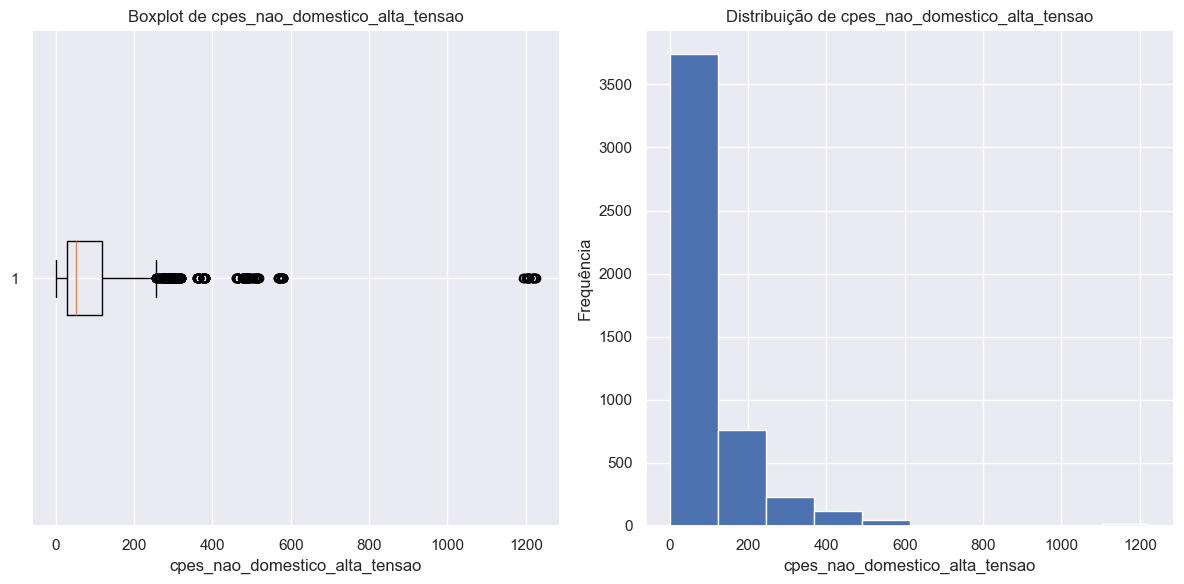

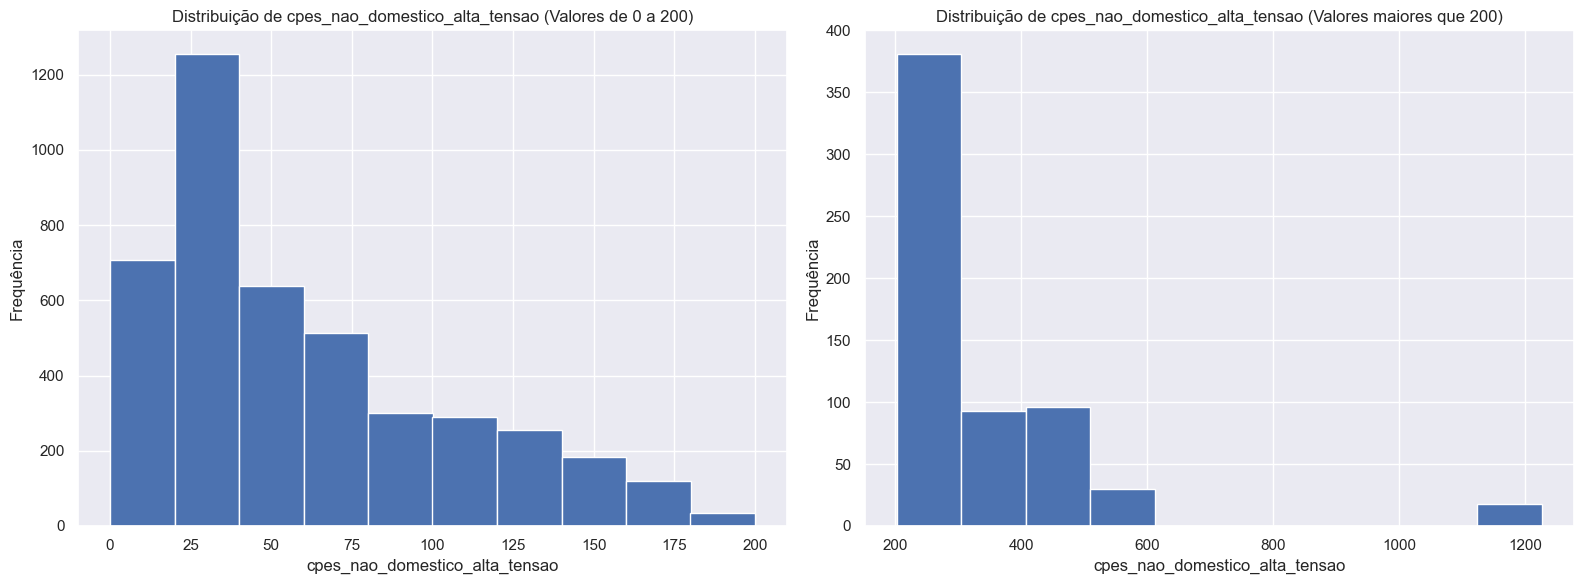

In [24]:
# Coluna para o histograma
coluna_cpes_nao_domestico_alta = 'cpes_nao_domestico_alta_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_nao_domestico_alta], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_nao_domestico_alta}')
ax_boxplot.set_xlabel(coluna_cpes_nao_domestico_alta)

# Histograma
ax_hist.hist(merged_df[coluna_cpes_nao_domestico_alta], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_nao_domestico_alta}')
ax_hist.set_xlabel(coluna_cpes_nao_domestico_alta)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 400
lower_limit_1 = 0
high_limit_1 = 200
filtered_data_1 = merged_df[(merged_df[coluna_cpes_nao_domestico_alta] >= lower_limit_1) & (merged_df[coluna_cpes_nao_domestico_alta] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 400
filtered_data_2 = merged_df[(merged_df[coluna_cpes_nao_domestico_alta] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 400
axes[0].hist(filtered_data_1[coluna_cpes_nao_domestico_alta], bins=10)
axes[0].set_title(f'Distribuição de {coluna_cpes_nao_domestico_alta} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_cpes_nao_domestico_alta)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 400
axes[1].hist(filtered_data_2[coluna_cpes_nao_domestico_alta], bins=10)
axes[1].set_title(f'Distribuição de {coluna_cpes_nao_domestico_alta} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_cpes_nao_domestico_alta)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [25]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_nao_domestico_alta])
print(f"Outliers na coluna '{coluna_cpes_nao_domestico_alta}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_cpes_nao_domestico_alta])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_nao_domestico_alta}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_nao_domestico_alta_tensao':
108     297
109     297
110     297
111     297
112     298
       ... 
4855    320
4856    320
4857    320
4858    320
4859    320
Name: cpes_nao_domestico_alta_tensao, Length: 364, dtype: int64

% outliers 'cpes_nao_domestico_alta_tensao' é de 7.41%.


#### Gráfico da variável CPEs Não Doméstico Baixa Tensão

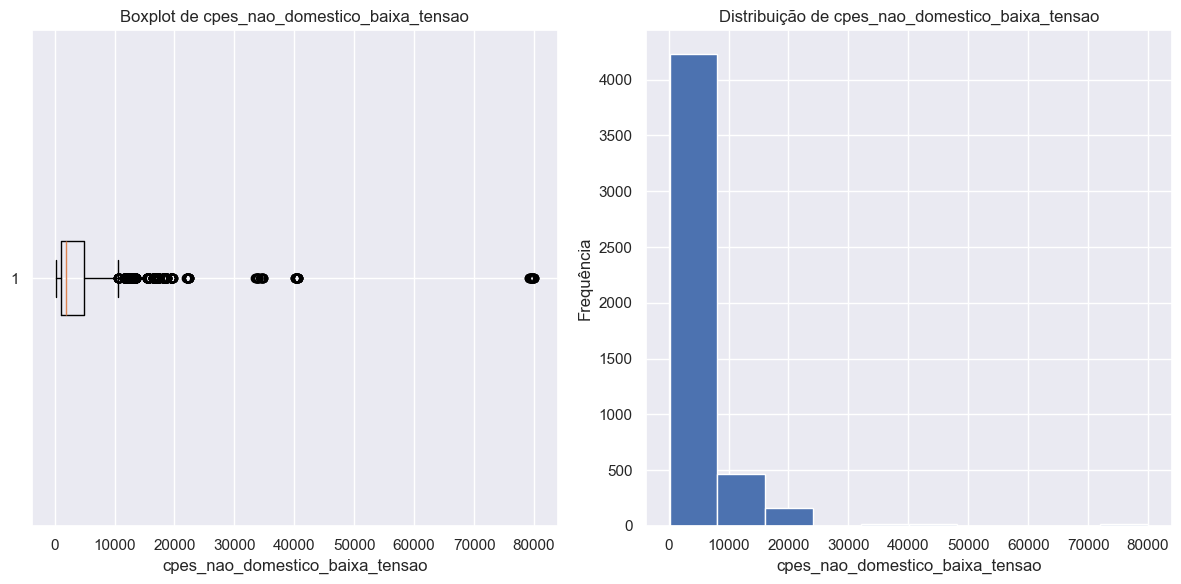

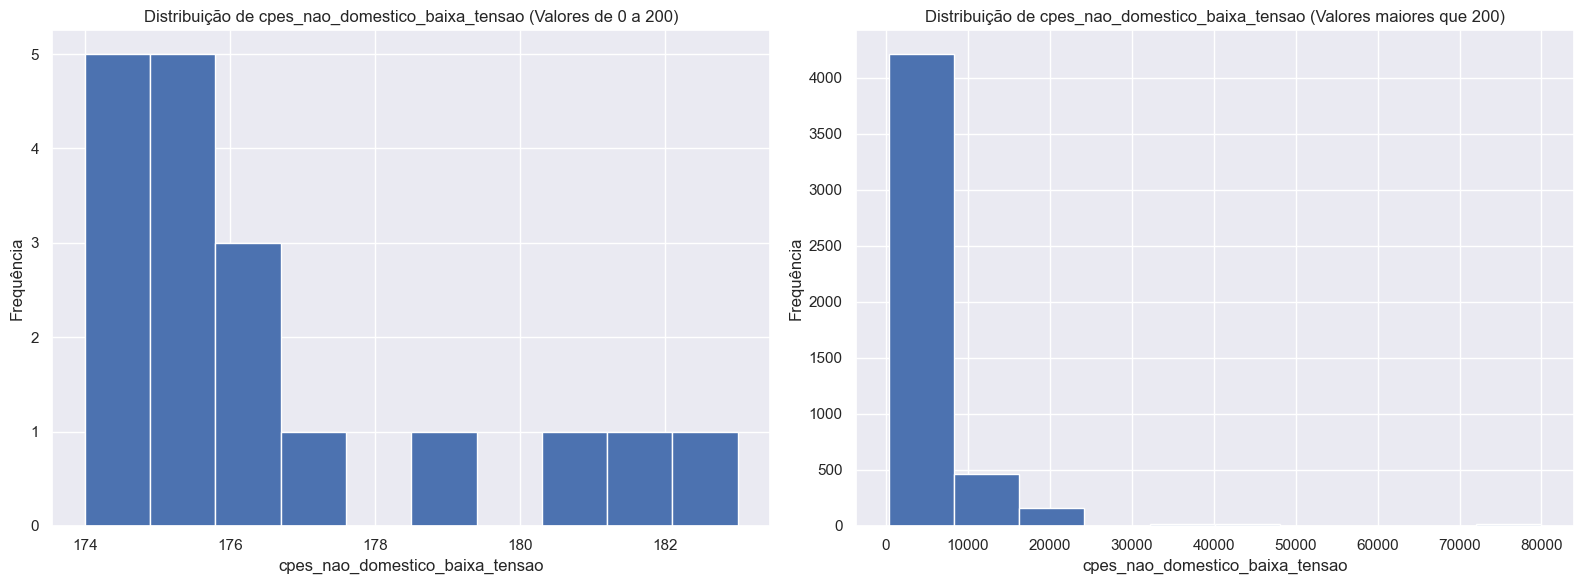

In [26]:
# Coluna para o histograma
coluna_cpes_nao_domestico_baixa = 'cpes_nao_domestico_baixa_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_nao_domestico_baixa], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_nao_domestico_baixa}')
ax_boxplot.set_xlabel(coluna_cpes_nao_domestico_baixa)

# Histograma
ax_hist.hist(merged_df[coluna_cpes_nao_domestico_baixa], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_nao_domestico_baixa}')
ax_hist.set_xlabel(coluna_cpes_nao_domestico_baixa)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 400
lower_limit_1 = 0
high_limit_1 = 200
filtered_data_1 = merged_df[(merged_df[coluna_cpes_nao_domestico_baixa] >= lower_limit_1) & (merged_df[coluna_cpes_nao_domestico_baixa] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 400
filtered_data_2 = merged_df[(merged_df[coluna_cpes_nao_domestico_baixa] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 400
axes[0].hist(filtered_data_1[coluna_cpes_nao_domestico_baixa], bins=10)
axes[0].set_title(f'Distribuição de {coluna_cpes_nao_domestico_baixa} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_cpes_nao_domestico_baixa)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 400
axes[1].hist(filtered_data_2[coluna_cpes_nao_domestico_baixa], bins=10)
axes[1].set_title(f'Distribuição de {coluna_cpes_nao_domestico_baixa} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_cpes_nao_domestico_baixa)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [27]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_nao_domestico_baixa])
print(f"Outliers na coluna '{coluna_cpes_nao_domestico_baixa}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_cpes_nao_domestico_baixa])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_nao_domestico_baixa}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_nao_domestico_baixa_tensao':
270     18431
271     18457
272     18477
273     18492
274     18518
        ...  
4801    13311
4802    13329
4803    13353
4804    13360
4805    13375
Name: cpes_nao_domestico_baixa_tensao, Length: 447, dtype: int64

% outliers 'cpes_nao_domestico_baixa_tensao' é de 9.10%.


#### Gráfico da variável CPEs Outros Alta Tensão

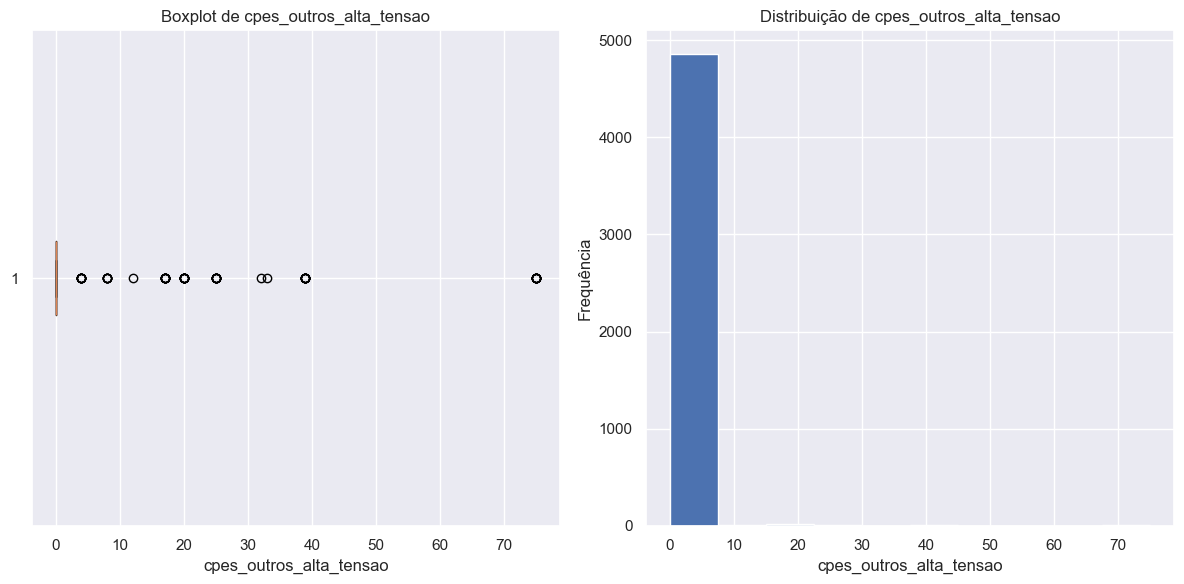

In [28]:
# Coluna para o histograma
coluna_cpes_outros_alta = 'cpes_outros_alta_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_outros_alta], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_outros_alta}')
ax_boxplot.set_xlabel(coluna_cpes_outros_alta)

# Histograma
ax_hist.hist(merged_df[coluna_cpes_outros_alta], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_outros_alta}')
ax_hist.set_xlabel(coluna_cpes_outros_alta)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [29]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_outros_alta])
print(f"Outliers na coluna '{coluna_cpes_outros_alta}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'cpes_outros'
total_valores = len(merged_df[coluna_cpes_outros_alta])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_outros_alta}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_outros_alta_tensao':
630      8
702     20
703     20
704     20
705     20
        ..
4847    25
4848    25
4849    25
4850    25
4851    25
Name: cpes_outros_alta_tensao, Length: 67, dtype: int64

% outliers 'cpes_outros_alta_tensao' é de 1.36%.


#### Gráfico da variável CPEs Outros Baixa Tensão

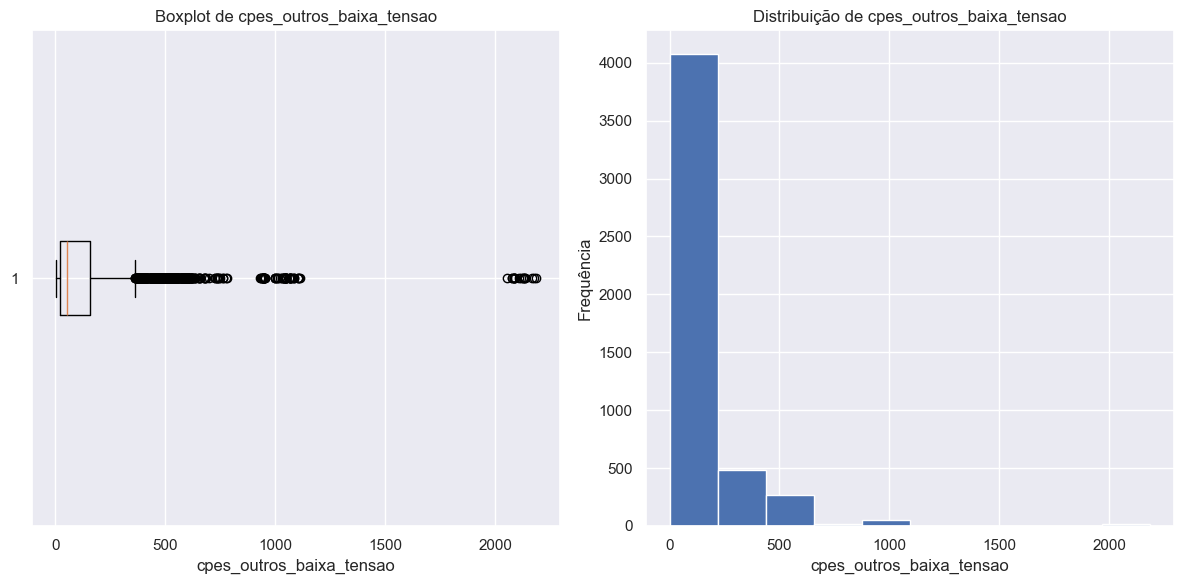

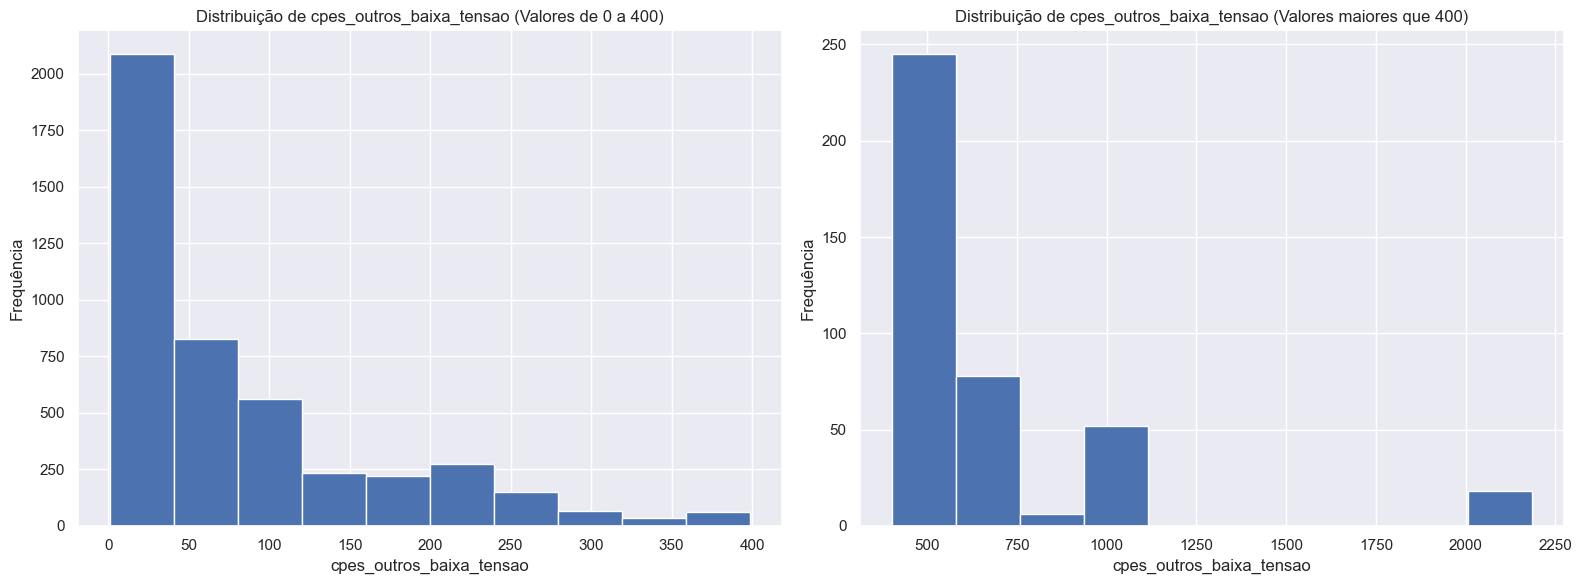

In [30]:
# Coluna para o histograma
coluna_cpes_outros_baixa = 'cpes_outros_baixa_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_outros_baixa], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_outros_baixa}')
ax_boxplot.set_xlabel(coluna_cpes_outros_baixa)

# Histograma
ax_hist.hist(merged_df[coluna_cpes_outros_baixa], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_outros_baixa}')
ax_hist.set_xlabel(coluna_cpes_outros_baixa)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 400
lower_limit_1 = 0
high_limit_1 = 400
filtered_data_1 = merged_df[(merged_df[coluna_cpes_outros_baixa] >= lower_limit_1) & (merged_df[coluna_cpes_outros_baixa] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 400
filtered_data_2 = merged_df[(merged_df[coluna_cpes_outros_baixa] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 400
axes[0].hist(filtered_data_1[coluna_cpes_outros_baixa], bins=10)
axes[0].set_title(f'Distribuição de {coluna_cpes_outros_baixa} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_cpes_outros_baixa)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 400
axes[1].hist(filtered_data_2[coluna_cpes_outros_baixa], bins=10)
axes[1].set_title(f'Distribuição de {coluna_cpes_outros_baixa} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_cpes_outros_baixa)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [31]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_outros_baixa])
print(f"Outliers na coluna '{coluna_cpes_outros_baixa}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'cpes_outros'
total_valores = len(merged_df[coluna_cpes_outros_baixa])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_outros_baixa}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_outros_baixa_tensao':
270     607
271     600
272     594
273     608
274     621
       ... 
4801    570
4802    565
4803    570
4804    580
4805    559
Name: cpes_outros_baixa_tensao, Length: 459, dtype: int64

% outliers 'cpes_outros_baixa_tensao' é de 9.34%.


#### Gráfico da variável CPEs Mobilidade Eletrica Não Baixa Tensão

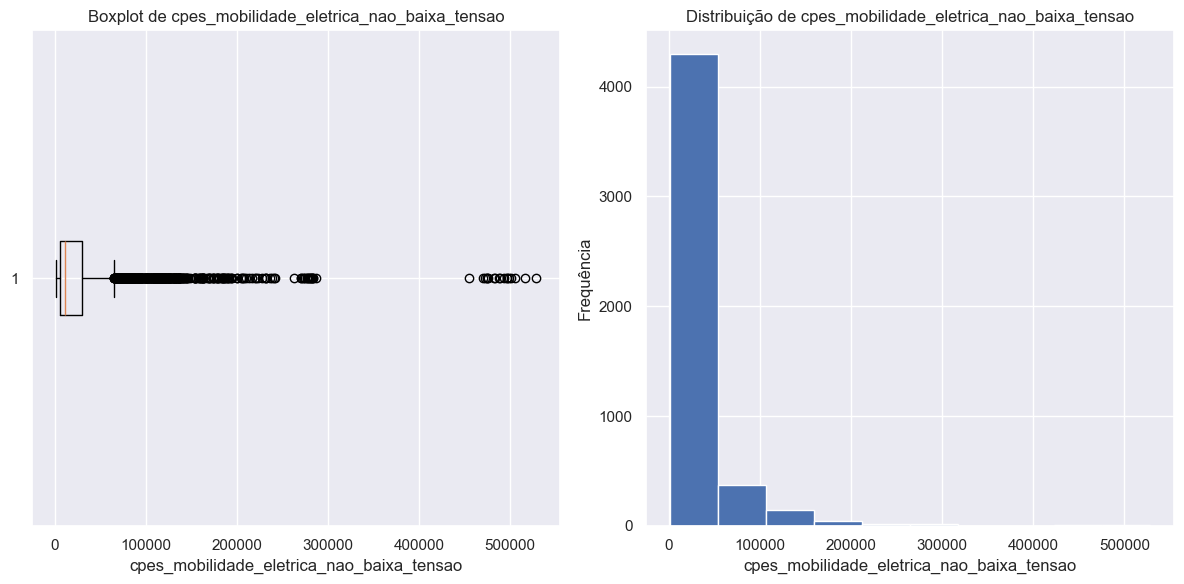

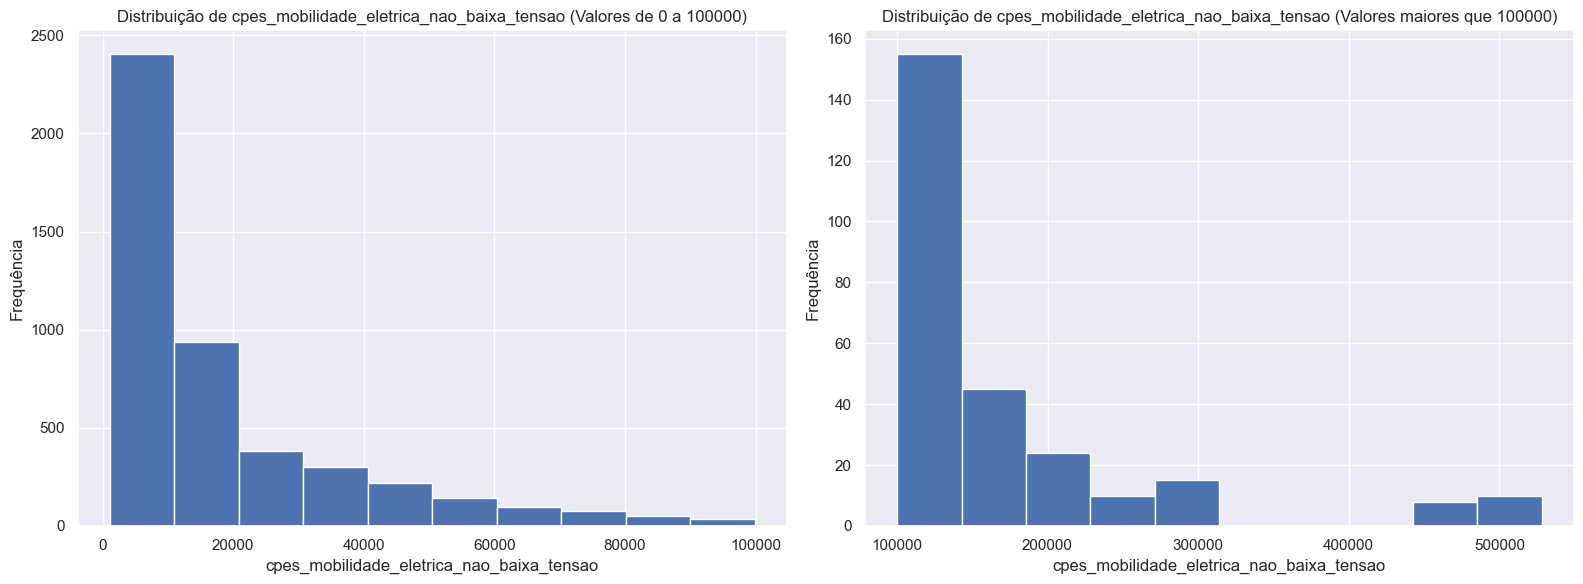

In [32]:
# Coluna para analisar
coluna_mob_elect_n_baixa = 'cpes_mobilidade_eletrica_nao_baixa_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_mob_elect_n_baixa], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_mob_elect_n_baixa}')
ax_boxplot.set_xlabel(coluna_mob_elect_n_baixa)

# Histograma
ax_hist.hist(merged_df[coluna_mob_elect_n_baixa], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_mob_elect_n_baixa}')
ax_hist.set_xlabel(coluna_mob_elect_n_baixa)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 400
lower_limit_1 = 0
high_limit_1 = 100000
filtered_data_1 = merged_df[(merged_df[coluna_mob_elect_n_baixa] >= lower_limit_1) & (merged_df[coluna_mob_elect_n_baixa] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 400
filtered_data_2 = merged_df[(merged_df[coluna_mob_elect_n_baixa] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 400
axes[0].hist(filtered_data_1[coluna_mob_elect_n_baixa], bins=10)
axes[0].set_title(f'Distribuição de {coluna_mob_elect_n_baixa} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_mob_elect_n_baixa)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 400
axes[1].hist(filtered_data_2[coluna_mob_elect_n_baixa], bins=10)
axes[1].set_title(f'Distribuição de {coluna_mob_elect_n_baixa} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_mob_elect_n_baixa)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [33]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_mob_elect_n_baixa])
print(f"Outliers na coluna '{coluna_mob_elect_n_baixa}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'mobilidade eletrica nao'
total_valores = len(merged_df[coluna_mob_elect_n_baixa])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_mob_elect_n_baixa}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_mobilidade_eletrica_nao_baixa_tensao':
82      65194
83      68000
84      68704
85      71436
86      74536
        ...  
4801    85454
4802    89428
4803    92846
4804    93678
4805    97548
Name: cpes_mobilidade_eletrica_nao_baixa_tensao, Length: 470, dtype: int64

% outliers 'cpes_mobilidade_eletrica_nao_baixa_tensao' é de 9.56%.


#### Gráfico da variável CPEs Mobilidade Eletrica Sim Baixa Tensão

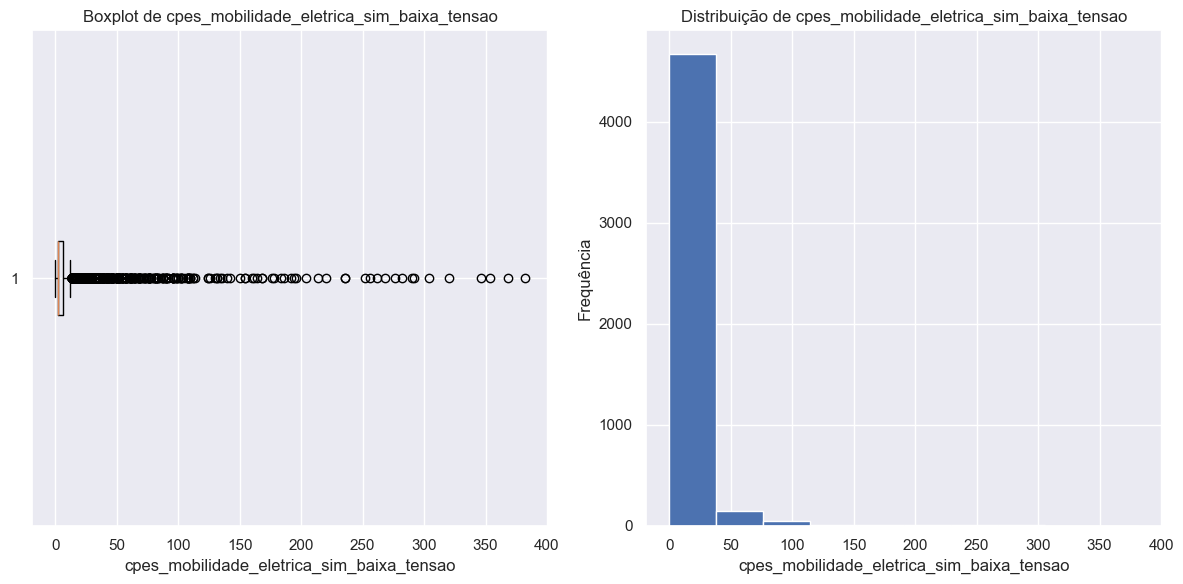

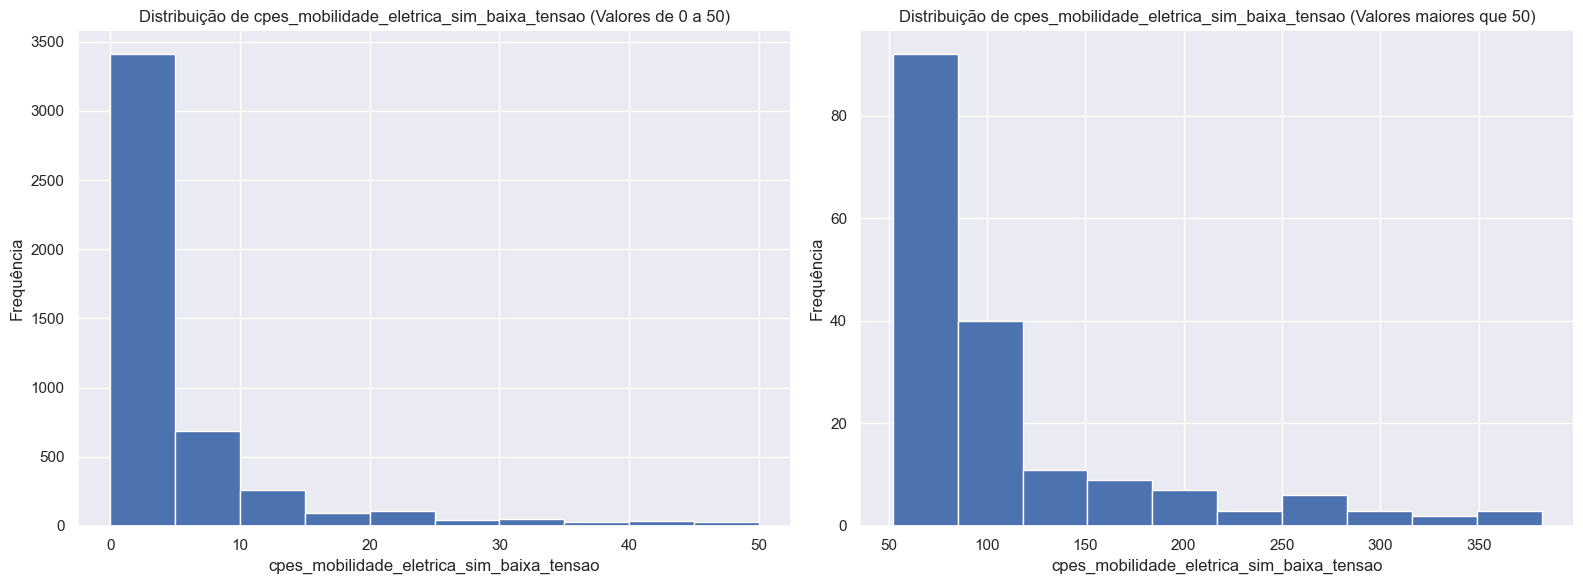

In [34]:
# Coluna para analisar
coluna_mob_elect_sim_baixa = 'cpes_mobilidade_eletrica_sim_baixa_tensao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_mob_elect_sim_baixa], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_mob_elect_sim_baixa}')
ax_boxplot.set_xlabel(coluna_mob_elect_sim_baixa)

# Histograma
ax_hist.hist(merged_df[coluna_mob_elect_sim_baixa], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_mob_elect_sim_baixa}')
ax_hist.set_xlabel(coluna_mob_elect_sim_baixa)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 400
lower_limit_1 = 0
high_limit_1 = 50
filtered_data_1 = merged_df[(merged_df[coluna_mob_elect_sim_baixa] >= lower_limit_1) & (merged_df[coluna_mob_elect_sim_baixa] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 400
filtered_data_2 = merged_df[(merged_df[coluna_mob_elect_sim_baixa] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 400
axes[0].hist(filtered_data_1[coluna_mob_elect_sim_baixa], bins=10)
axes[0].set_title(f'Distribuição de {coluna_mob_elect_sim_baixa} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_mob_elect_sim_baixa)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 400
axes[1].hist(filtered_data_2[coluna_mob_elect_sim_baixa], bins=10)
axes[1].set_title(f'Distribuição de {coluna_mob_elect_sim_baixa} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_mob_elect_sim_baixa)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [35]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_mob_elect_sim_baixa])
print(f"Outliers na coluna '{coluna_mob_elect_sim_baixa}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'mobilidade eletrica sim'
total_valores = len(merged_df[coluna_mob_elect_sim_baixa])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_mob_elect_sim_baixa}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'cpes_mobilidade_eletrica_sim_baixa_tensao':
72      22
73      22
74      20
75      22
76      22
        ..
4873    22
4874    26
4875    26
4876    26
4877    28
Name: cpes_mobilidade_eletrica_sim_baixa_tensao, Length: 640, dtype: int64

% outliers 'cpes_mobilidade_eletrica_sim_baixa_tensao' é de 13.02%.


#### Gráfico da variável Densidade Populacinal por Km2

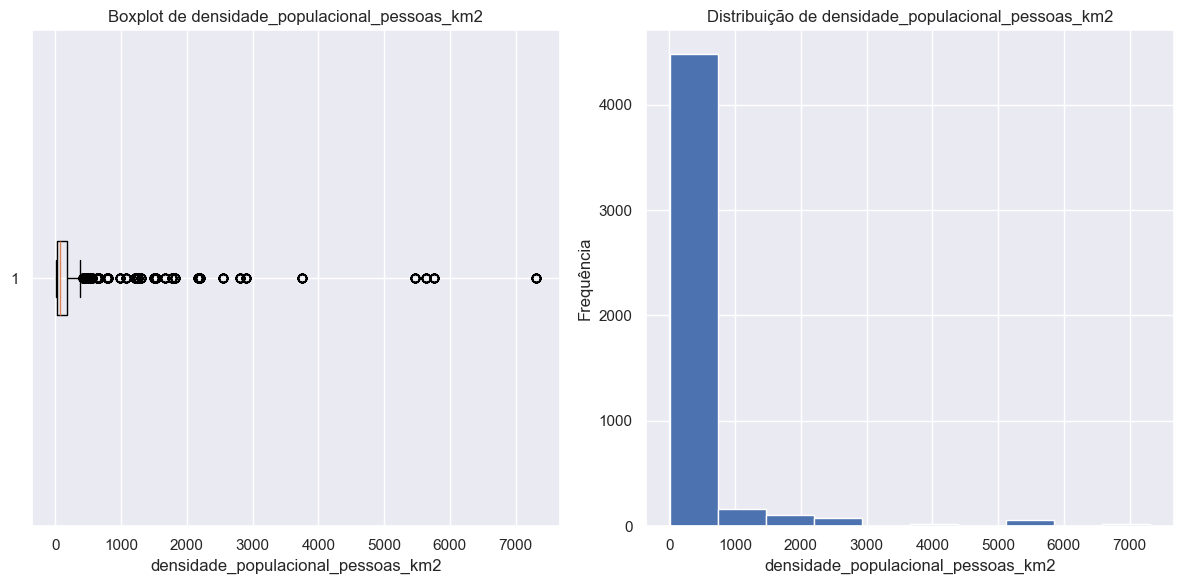

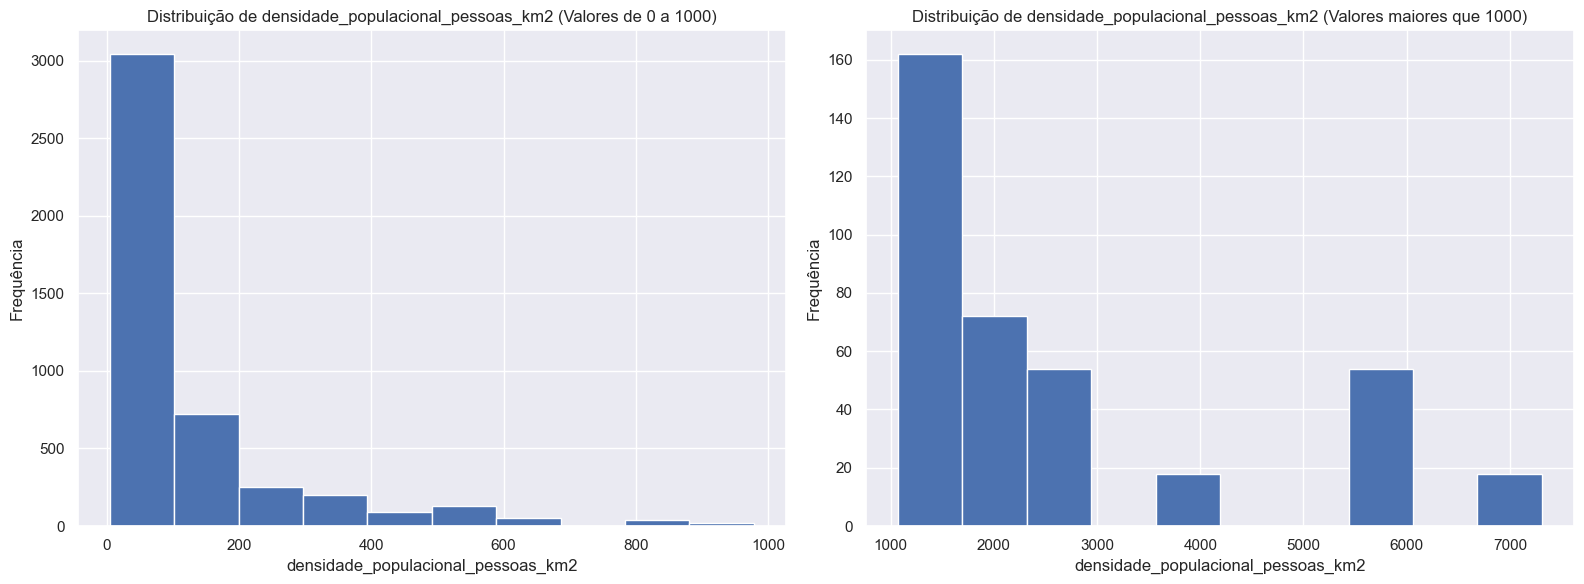

In [36]:
# Coluna para analisar
coluna_densidade_populacional = 'densidade_populacional_pessoas_km2'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_densidade_populacional], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_densidade_populacional}')
ax_boxplot.set_xlabel(coluna_densidade_populacional)

# Histograma
ax_hist.hist(merged_df[coluna_densidade_populacional], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_densidade_populacional}')
ax_hist.set_xlabel(coluna_densidade_populacional)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Filtrar os dados para valores entre 0 e 400
lower_limit_1 = 0
high_limit_1 = 1000
filtered_data_1 = merged_df[(merged_df[coluna_densidade_populacional] >= lower_limit_1) & (merged_df[coluna_densidade_populacional] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 400
filtered_data_2 = merged_df[(merged_df[coluna_densidade_populacional] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 400
axes[0].hist(filtered_data_1[coluna_densidade_populacional], bins=10)
axes[0].set_title(f'Distribuição de {coluna_densidade_populacional} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_densidade_populacional)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 400
axes[1].hist(filtered_data_2[coluna_densidade_populacional], bins=10)
axes[1].set_title(f'Distribuição de {coluna_densidade_populacional} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_densidade_populacional)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [37]:
# Encontrar outliers
outliers = find_outliers(merged_df[coluna_densidade_populacional])
print(f"Outliers na coluna '{coluna_densidade_populacional}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'densidade populacional'
total_valores = len(merged_df[coluna_densidade_populacional])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_densidade_populacional}' é de {percent_outliers:.2f}%.")

Outliers na coluna 'densidade_populacional_pessoas_km2':
270     2544.1
271     2544.1
272     2544.1
273     2544.1
274     2544.1
         ...  
4891     551.5
4892     551.5
4893     551.5
4894     551.5
4895     551.5
Name: densidade_populacional_pessoas_km2, Length: 702, dtype: float64

% outliers 'densidade_populacional_pessoas_km2' é de 14.29%.


### Remover a variável CPEs iluminação pública alta tensão
- Elimina-se porque os valores são sempre zero e por isso não têm interesse de análise

In [38]:
merged_df.drop(columns=['cpes_iluminacao_publica_alta_tensao'], inplace=True)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ano                                        4914 non-null   int64  
 1   mes                                        4914 non-null   int64  
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64  
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64  
 4   cpes_domestico_baixa_tensao                4914 non-null   int64  
 5   cpes_domestico_alta_tensao                 4914 non-null   int64  
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64  
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64  
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64  
 9   cpes_outros_baixa_tensao                   4914 non-null   int64  
 10  cpes_outros_alta_tensao 

In [39]:
# Verificar nulls
null_counts = merged_df.isnull().sum()

# Ver nulls por coluna
print("Número de nulls por coluna:")
print(null_counts)

Número de nulls por coluna:
ano                                          0
mes                                          0
energia_ativa_baixa_tensao_kwh               0
energia_ativa_alta_tensao_kwh                0
cpes_domestico_baixa_tensao                  0
cpes_domestico_alta_tensao                   0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_nao_domestico_alta_tensao               0
cpes_outros_baixa_tensao                     0
cpes_outros_alta_tensao                      0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
densidade_populacional_pessoas_km2           0
dtype: int64


In [40]:
file_path = data_path + 'treated/prepared/merged-dataset.csv'

merged_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/merged-dataset.csv
